# Massachusetts and Boston Crime Analysis

## Authors: Jenny Zhang, Anthony Castillo, Eisuke Okuda

# Abstract

Crime data analytics have played a big role in improving law enforcement for the last many years. It has helped identify and analyze patterns and trends in crime and disorder. Thus it is important for us to understand the method and put it into practice. We studied the crime datasets in Boston and Massachusetts from 1960 to 2018 to answer our questions. We wanted to see if there were changes in different kinds of crimes, such as property and violent crime, and if we can accurately predict the rise (or fall) robberies in Boston specifically. Our project has two parts: exploratory data analysis on Massachussetts crime data and time series analysis on Boston robberies data.

# Introduction

The main purpose of our analysis was to study the trends in crime data in Massachussetts over time and forecast robberies in Boston. In our exploratory data analysis, we wanted to study the Massachussetts dataset, which contains data on population, the amount of crime committed in the categories: Murder, Rape, Robbery, Aggravated Assault, Burglary, Larceny Theft and Vehicle Theft, the amount of violent and property crimes, and index: the amount of total (both violent and property) crimes. Property crimes consist of Robbery, Burglary, Larceny and Vehicle Theft while Violent crimes consist of Murder, Rape and Aggravated Assault. We wanted to study specific questions, such as what the most common crimes are, how violent crimes compare to property crimes, and how crimes changed throughout time. Additionally, we wanted to study the density of crimes per year using heatmaps. 

The second part of our project consists of a time series analysis on robberies in Boston from 1960 to 2018. Here we took the time series data we were given and decomposed it for a preliminary analysis. Afterwards, we established factors for auto regression, differencing, moving average, and seasonality parameters. Then, we took our data and used one-step forecasting to predict Boston Robberies for the next 4 years.

Lastly we wanted to see if there were any correlations between crime in Massachussetts and crime in Boston using hypothesis testing. 

In [21]:
import pandas as pd
from random import randrange
import numpy as np
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot
from scipy import stats
import scipy
import os
import re
import datetime
import itertools
import warnings
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

This is just us loading the Massachusetts crime dataset, and then converting all fields in that
dataset from string type to float type. This makes statistical analysis possible. We then take the
theft-related data from Massachusetts and trim it to match up with our Boston data in terms of
what time interval will be discussed. Lastly, we aggregate our monthly Boston data into an annual sum using resample, and then convert the new object into a list.

In [22]:
mass = pd.read_csv('massachusettsdata.csv', header=0, index_col=0,parse_dates=True, squeeze=True)
mass['Population'] = mass['Population'].str.replace(',','').astype(float)
mass['Index'] = mass['Index'].str.replace(',','').astype(float)
mass['Violent'] = mass['Violent'].str.replace(',','').astype(float)
mass['Property'] = mass['Property'].str.replace(',','').astype(float)
mass['Murder'] = mass['Murder'].str.replace(',','').astype(float)
mass['Forcible Rape'] = mass['Forcible Rape'].str.replace(',','').astype(float)
mass['Robbery'] = mass['Robbery'].str.replace(',','').astype(float)
mass['Aggravated Assault'] = mass['Aggravated Assault'].str.replace(',','').astype(float)
mass['Burglary'] = mass['Burglary'].str.replace(',','').astype(float)
mass['Larceny - Theft'] = mass['Larceny - Theft'].str.replace(',','').astype(float)
mass['Vehicle Theft'] = mass['Vehicle Theft'].str.replace(',','').astype(float)

In [23]:
mass

,Population,Index,Violent,Property,Murder,Forcible Rape,Robbery,Aggravated Assault,Burglary,Larceny - Theft,Vehicle Theft
Year,,,,,,,,,,,
1960-01-01,5148578.0,62767.0,2512.0,60255.0,74.0,249.0,1052.0,1137.0,15918.0,33469.0,10868.0
1961-01-01,5234000.0,76560.0,2777.0,73783.0,77.0,291.0,1066.0,1343.0,19683.0,39885.0,14215.0
1962-01-01,5161000.0,84107.0,3207.0,80900.0,95.0,256.0,1331.0,1525.0,21181.0,44051.0,15668.0
1963-01-01,5218000.0,90056.0,3454.0,86602.0,101.0,236.0,1409.0,1708.0,23121.0,44382.0,19099.0
1964-01-01,5338000.0,106099.0,4559.0,101540.0,105.0,320.0,1636.0,2498.0,28278.0,49129.0,24133.0
1965-01-01,5348000.0,113455.0,5270.0,108185.0,129.0,290.0,2139.0,2712.0,29655.0,49997.0,28533.0
1966-01-01,5383000.0,122477.0,6201.0,116276.0,128.0,344.0,2474.0,3255.0,33326.0,53244.0,29706.0
1967-01-01,5421000.0,134557.0,6919.0,127638.0,154.0,411.0,2818.0,3536.0,36621.0,54837.0,36180.0
1968-01-01,5437000.0,166802.0,8916.0,157886.0,188.0,518.0,4039.0,4171.0,47210.0,66823.0,43853.0


In [24]:
pop = mass['Population'].loc['1966-01-01':'1975-10-01']
ind = mass['Index'].loc['1966-01-01':'1975-10-01']
rob = mass['Robbery'].loc['1966-01-01':'1975-10-01']
lar = mass['Larceny - Theft'].loc['1966-01-01':'1975-10-01']
veh = mass['Vehicle Theft'].loc['1966-01-01':'1975-10-01']
bur = mass['Burglary'].loc['1966-01-01':'1975-10-01']

# Exploratory Data Analysis

## What are the most common crimes?

### Barplot of all the individual crimes:

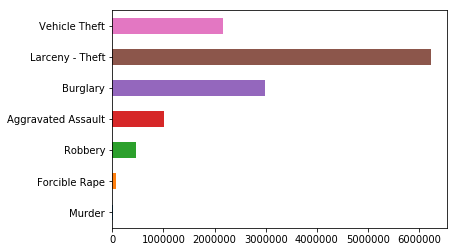

In [25]:
#write code for barplot of all the individual crimes
#(sum the columns for murder, forcible rape, robbery, aggravated assault, burglary, larceny-theft, 
# vehicle theft, and plot a bar of the columns as x axis vs the total sum on y axis)
#mass.loc["Sum"]=mass.sum(axis=0)
mysum = mass.sum(axis=0)
mysum
sum1 = mysum[4:]
sum1
ax = sum1.plot.barh(rot=0)

This bar plot depicts all the individual crimes committed throughout all the years combined and how many occurences there were for each crime. Out of all the crimes, larceny theft had the highest occurence, followed by burglary and then vehicle theft. Collectively, there is a very small amount of murders.

### Barplot of violent vs property crimes:

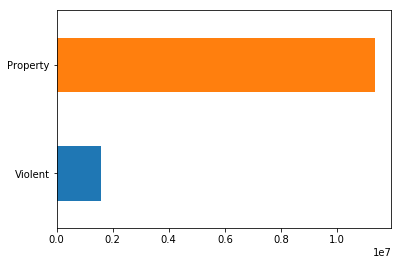

In [26]:
#write code for barplot of violent vs property crimes
#sum the columns for violent and property and plot a bar of the violent and property as x axis vs total sum on y axis
sum2 = mysum[2:4]
sum2
ax = sum2.plot.barh(rot=0)

The bar plot depicts the occurences of property and violent crimes for all the years combined. Property crimes out count violent crimes by more than four times. This is likely due to violent crimes having harsher punishments, and property crimes having a higher unsolved rate.

## What years had the most crimes?

### How was overall crime throughout the years?

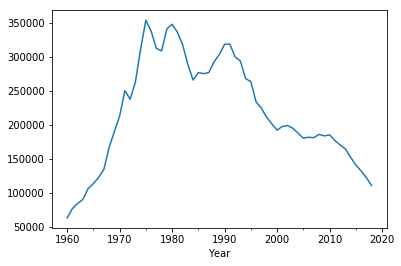

In [27]:
mass.iloc[:,1].plot()

Here, we created a line plot of total crimes to show the transition throughout the years.
The number kept going up from 1960 and around 1975 we had the most crimes. Then around 1990, the crime rate suddenly starts to drop without spiking back up again.

### How did violent and property crimes change throughout the years?

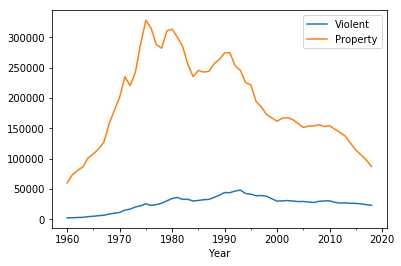

In [28]:
#write code for a bar plot of violent and property crimes for every year. Each year should have two bars, one for violence and one for property.
mass.iloc[:,2:4].plot()

We created a line plot to see how violent and property crimes changed over
the years. You can see that property crimes follows the same trend as total crime.
However, it is because the number of property crimes is much bigger than that of
violent. Propert crime spikes a lot throughout the years while violent crime tends to have a more stable and straight line.

### Do different crimes have different patterns throughout the years?

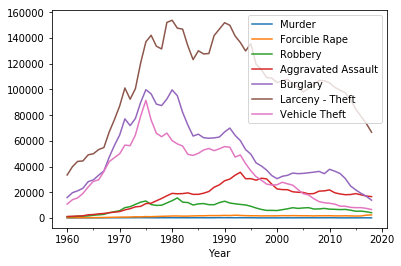

In [29]:
#draw a line plot of all the columns for murder, forcible rape, robbery, aggravated assault, burglary, larceny-theft, 
# vehicle theft over the years. One line for each column.
mass.iloc[:,4:].plot()

We generated a plot to see if different crimes have different patterns over time.
We can observe that top 3 crimes: larceny theft, burglary and vehicle theft are all following the same pattern. The crimes are very likely correlated strongly with each other, and all have many spikes in time where it is occuring more often. On the other hand, crimes like forcible rape and murder are practically straight lines throughout the years. These crimes seem to not follow any pattern. Aggravated assualt and robbery seem to spike a very tiny amount compared to the top three property crimes but generally dont change too much either.

### Heatmap of crimes vs years:

Below, we have three heat maps showing the volume of Massachusetts crime over time. In the first
heat map, property-related crimes take up the highest density of crimes from 1960 until present, so
I zoomed in on burglaries, robberies, larceny, and vehicular theft in a second heat map. There, I
found larceny to have the highest volume of the four theft-related crimes. I then zoomed in again to
those four crimes within the time interval when the Boston data was gathered, and this conclusion
was held true even in the time era from 1966 to 1975. We also repeated this for log-transformations of the data to achieve clearer results, and we found the exact same things as without the log-
transformations. New findings from the log-transform include the fact that of all crimes, murder and forcible rape had the lowest and second lowest volumes.

In [30]:
mass_l = mass.apply(np.log)
rob_l = rob.apply(np.log)
lar_l = lar.apply(np.log)
veh_l = veh.apply(np.log)
bur_l = bur.apply(np.log)

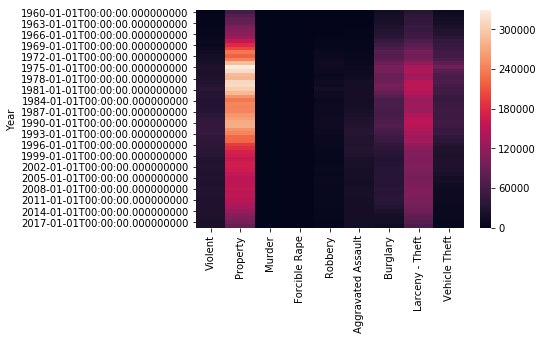

In [31]:
mass_heat_1 = mass.iloc[:,2:11]
sns.heatmap(mass_heat_1)

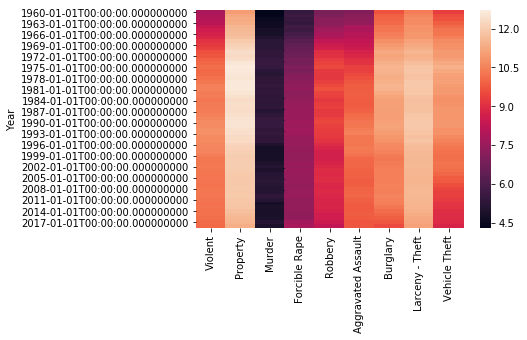

In [32]:
mass_l_heat_1 = mass_l.iloc[:,2:11]
sns.heatmap(mass_l_heat_1)

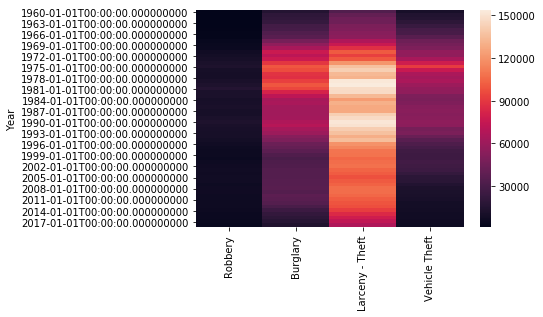

In [33]:
mass_heat_2 = mass.iloc[:,[6,8,9,10]]
sns.heatmap(mass_heat_2)

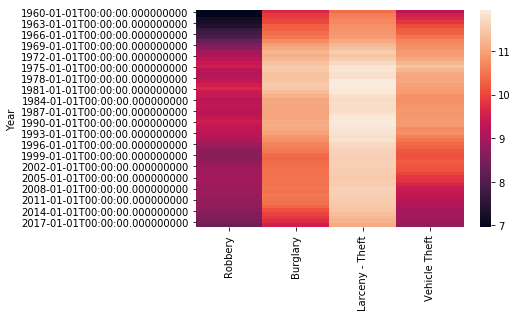

In [34]:
mass_l_heat_2 = mass_l.iloc[:,[6,8,9,10]]
sns.heatmap(mass_l_heat_2)

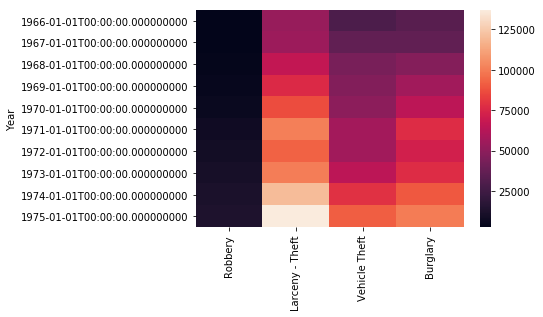

In [35]:
df = pd.DataFrame([rob,lar,veh,bur]).transpose()
sns.heatmap(df)

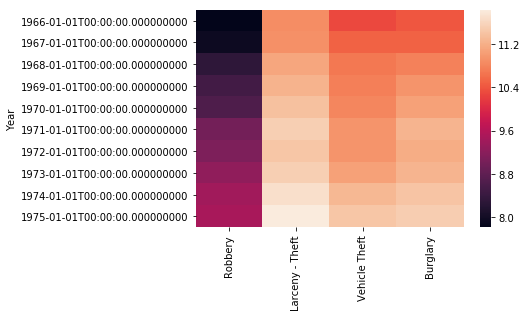

In [36]:
df = pd.DataFrame([rob_l,lar_l,veh_l,bur_l]).transpose()
sns.heatmap(df)

# Time Series

First, we upload a csv file of our data. Set header and index_col to 0 so no rows are skipped and
the data column is used as the index for our analysis. We also want to ignore warnings in the future
so we can focus on our code and our results.

In [37]:
robberies = pd.read_csv('robberies.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
warnings.filterwarnings("ignore")

After uploading our dataset to the kernel, we plotted our time series as seen below. From what
we can gather from the visual, it seems as though the volume of robberies is increasing over time,
with fluctuations as time passes.

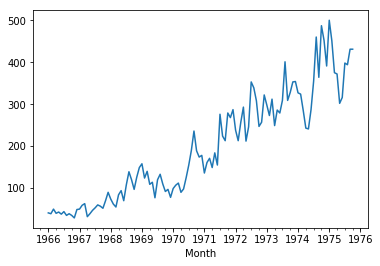

In [38]:
robberies.plot()
pyplot.show()

After plotting the time series proper, we then plot a barplot of the time series data, which illustrates
how frequencies for armed robberies in Boston are frontloaded in that our largest quantities are in
the first and second bins. Afterwards, the next highest point in our data is at around the 300-crime
mark. Immediately afterwards, we convert this barplot into a kernel density estimate of our time
series, which shows what is likely a bimodal distribution on the grounds that peaks do show up
at around the 100-crime mark and 300-crime mark as discussed earlier. This all means that there
are more months that had less than 100 robberies committed in the month of Boston than there is
any other number of robberies in the set of months we are looking at. This is significant because it
shows how a good portion of our time series (and thus much of the interval between 1966 and 1975)
is spent within a marginally low number of robberies compared to the rest of the study time. By
looking at the time series, we see the number of robberies hover at a volume of about 100 robberies
per month, and then spike up to about 300 robberies per month at about the year of 1970. Such
is then reflected in the barplot and kernel density estimate, which then means that if we were to
pull a month from our data set based on its robbery volume, we would most likely end up pulling a
month with a low number of robberies (less than 100) or a month with around 300 robberies than
any other month in our dataset.

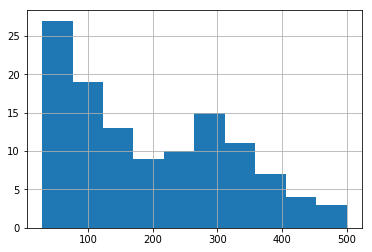

In [39]:
robberies.hist()
pyplot.show()

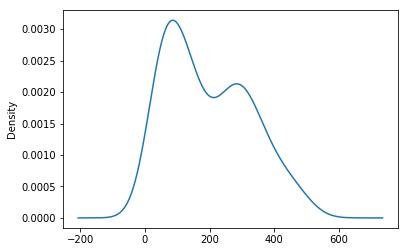

In [40]:
robberies.plot(kind='kde')
pyplot.show()

After deriving a kernel density estimate of our data from our barplot, we then resort to using the
Augmented Dickey-Fuller Unit Root Test and the Kwiatkowski-Phillips-Schmidt-Shin Test to see whether or not our data is seasonal. The ADF test concludes a lack of stationarity, and the KPSS concludes the existence of stationarity. Thus, we wil perform further tests and what not to sort this out. The ADF test examines whether or not a unit root is present in the time series sample. By us failing to reject the null hypothesis, we are saying this dataset is probably not stationary (and thus there likely does not exists a unit root in the time series characteristic equation). The KPSS test concludes the exact opposite, and thus further exploration is necessary.

In [41]:
def ts(data):
    print('Augmented Dickey-Fuller Unit Root Test')
    stat, p, lags, obs, crit, t = adfuller(data)
    print('stat=%.3f, p=%.3f' % (stat, p))
    
    if p > 0.05:
        print('Fail to Reject H0, Probably not Stationary')
    else:
        print('Reject H0, Probably Stationary')
    
    print('_______________________________________')
    print(' ')
    
    print('Kwiatkowski-Phillips-Schmidt-Shin Test')
    stat, p, lags, crit = kpss(data)
    print('stat=%.3f, p=%.3f' % (stat, p))
    
    if p > 0.05:
        print('Fail to Reject H0, Probably not Stationary')
    else:
        print('Reject H0, Probably Stationary')

ts(robberies)

Augmented Dickey-Fuller Unit Root Test
stat=1.001, p=0.994
Fail to Reject H0, Probably not Stationary
_______________________________________
 
Kwiatkowski-Phillips-Schmidt-Shin Test
stat=0.922, p=0.010
Reject H0, Probably Stationary


Below, we decompose our time series to it’s bare components. First, we set our model to additive
since we believe the components to this model (observed, trend, seasonality, and residual) are
being added together due to the fact that our data is based on monthly rotations of our data, and thus our seasonality is running on the same width and amplitudes for its cycles. Moreover, our decomposition shows the time series itself, along with a positive trend, a repeating seasonality that cycles at about every 12 months, and residuals which we will test later. The seasonality plot shows a clear dip during the winter and spring months, followed by a spike that begins in the June-July date range in each year (this could just be visually examined by using the years and tick marks on the x-axis of our plots as reference). My best guess for as to why this is happening relies on the fact that there are multiple universities in the Boston area along with much travel and a highly-mobile population that needs to commute to get to work. Thus we see a spike in armed robberies when summer is about to happen since a large sum of people might be traveling to or through the area to see family, only for crime to partially decrease as students go back to studying and then drop off during the winter months when it is usually too cold to be outside.

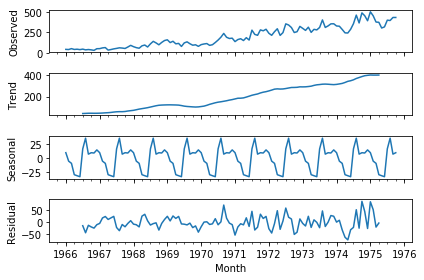

In [42]:
result = seasonal_decompose(robberies, model='additive', freq=12)
result.plot()
pyplot.show()

Below, we see our autocorrelation plot for our time series. Our autocorrelation plot shows values
that start off close to one, but then dip down close to zero at about lag 30, actually reach zero
at about lag 42, exit our confidence interval at about lag 47, re-enter the confidence interval at
about lag 105, and then reach zero again at abiut lag 120. This means that there is not much
of a correlation between time series values for observations between lags 30 and 42, along with
observations after lag 105. Observations up to lag 30 and between lags 47 and 105 do have a
correlation between time series values. Do keep in mind that every ten lags maps out to about a
year in time. Thus, we can say that this time series is mostly uncorrelated, and this is actually
important because it opens up an avenue where one can say data in this time series is actually
independent and identically distributed, which is important for later tests.

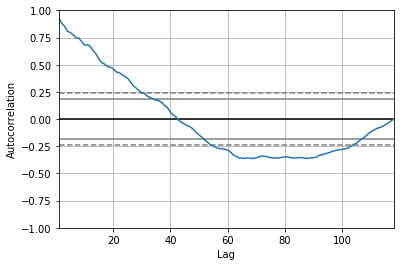

In [43]:
autocorrelation_plot(robberies)
pyplot.show()

After plotting out the autocorrelation visual, we then resort to actually building our model. We set
up our code such that the autocorrelation, moving averge, and differencing factors are all between
0 and 3. By using SARIMAX, we are able to compute Aikake information criterion (AIC) for all
possible models. After creating our for-loop and then accounting for our parameters, we arrive at
the fact that ARIMA(2,2,2) * (2,2,1,12)12 has the lowest AIC quantity at about 729.3. This means
our autoregressive, differencing, and moving average parameters are all the same. Specifically,
our model would then have exactly two autoregressive terms, two lagged forecast errors, and two
instances where we must difference our data in order to achieve stationarity. Earlier, we were in
conflict with whether or not our data was stationary. The presence of a non-zero differencing factor
indicates our data was not stationary. Lastly, the (2,2,1,12)12 component accounts for seasonality
in our data on a 12-month rotation. Thus, we move forward with this as our model.

In [44]:
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(robberies,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            #print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal,results.aic))
        except:
            continue

# Using MS Word and Control+F, I found the following model to have the lowest AIC:
# ARIMA(2, 2, 2)x(2, 2, 1, 12)12 - AIC:729.3023027121975

After deriving the model we would like to test, we actually go ahead and test it. From our results
below, we can see confidence intervals and z-tests for our different parameters. All autoregressive
terms are statistically significant, and all moving average terms are statistically insignificant. I did
independently test a few other models to see whether the moving-average factors could be made
statistically significant. While they could be made to have a p-value of less than .05, the AIC and
BIC criterion spike up too high for me to be comfortable using those as our model, and thus we
wil proceed with the chosen model anyhow.

In [45]:
mod = sm.tsa.statespace.SARIMAX(robberies,
                                order=(2, 2, 2),
                                seasonal_order=(2, 2, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0181      0.292     -3.483      0.000      -1.591      -0.445
ar.L2         -0.5189      0.135     -3.834      0.000      -0.784      -0.254
ma.L1         -0.4958    566.283     -0.001      0.999   -1110.390    1109.399
ma.L2         -0.5043    285.431     -0.002      0.999    -559.939     558.930
ar.S.L12      -0.5904      0.187     -3.162      0.002      -0.956      -0.224
ar.S.L24      -0.4002      0.169     -2.372      0.018      -0.731      -0.069
ma.S.L12      -1.0001    566.163     -0.002      0.999   -1110.659    1108.659
sigma2      1971.0198      0.033      6e+04      0.000    1970.955    1971.084


After verifying our model above, we then verify the residuals of that model and see if they fit a
normal distribution. From what we can see on the histrogram and normal Q-Q plot below, it seems
as if our residuals do follow a normal distribution, and thus our model checks out in this regard.

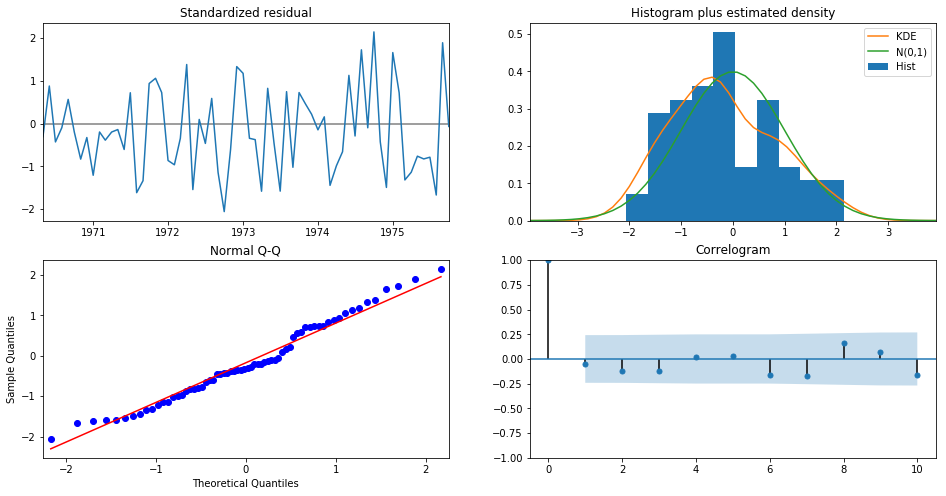

In [46]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

After verifying our model, we then do a one-step ahead forecast on the original time series. To do
this, we set up our code to use data starting at January 1, 1966 and ending on January 1, 1969
to make these predictions. Afterwards, we project out the rest of the time series and find that the
projected and observed data actually do match up totally when the confidence interval is accounted
for. This becomes useful when we go and forecast ahead of the actual time series itself as we know
what kind of model works.

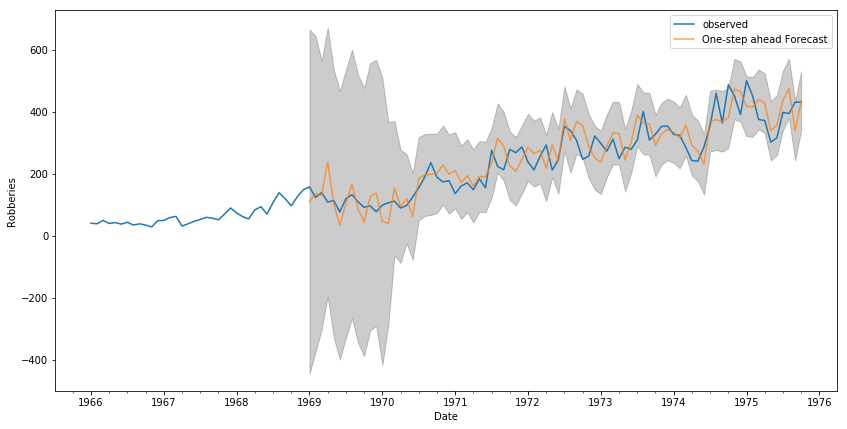

In [47]:
pred = results.get_prediction(start=pd.to_datetime('1969-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = robberies['1966-01-01':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Robberies')
plt.legend()
plt.show()

After making an initial projection from only part of our data, we are then able to gather statistics
about that projection. Specifically, we have our mean squared error and root mean squared error
below to show the predictive potency of a one-step ahead forecast. Values closer to zero are usually
better.

In [48]:
robberies_forecasted = pred.predicted_mean
robberies_truth = robberies['1970-01-01':]
mse = ((robberies_forecasted - robberies_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 2708.48
The Root Mean Squared Error of our forecasts is 52.04


We wrap up our time series analysis by actually projecting 50 months of armed robbery data in the
city of Boston. We can see a repeating pattern in our projection similar to that of the seasonality
plot in our decomposition model from earlier. Overall, it seems as though the number of armed
robberies in Boston stabilizes over time.

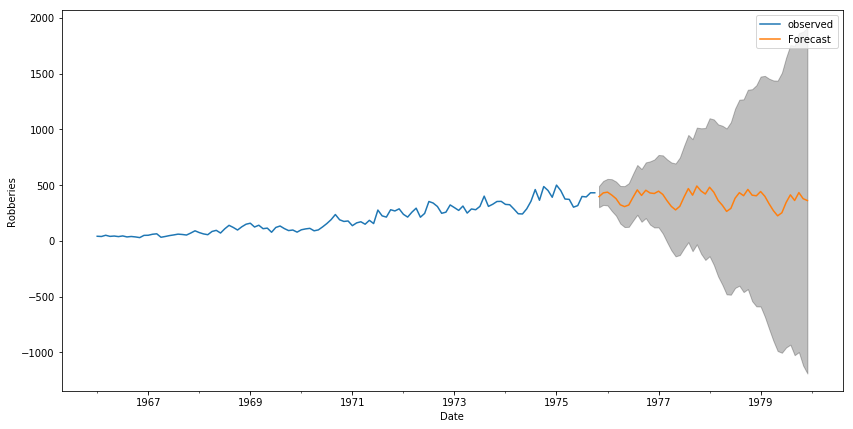

In [49]:
pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int()
ax = robberies.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
pred_ci.iloc[:, 0],
pred_ci.iloc[:, 1], color='k', alpha=.25)

ax.set_xlabel('Date')
ax.set_ylabel('Robberies')

7

plt.legend()
plt.show()

Lastly, we test for any relationships between Boston robberies and burglaries, robberies, larceny,
and vehicle theft in Massachusetts. All tests show some form of relationship between Boston
and Massachusetts crime in that era. This means either Boston was a large enough chunk of
Massachusett’s population at the time to be a leading statistical parameter in terms of predicting
crime, or the rest of the state was just behaving like Boston in that time interval. Specifically, the
Pearson’s, Spearman’s, and Kendall’s correlation tests are all to decide whether or not two sets of
data have some form of correlation. Pearson’s and Spearman’s tests both rely on the covariance of
both datasets divided by the product of their standard deviations as test statistics. The closer the
test statistic is to the absolute value of one, the stronger the correlation is between both datasets.
In our tests below, every instance of both of these tests has a high correlation statistics (all greater
than 0.90), and thus we can infer a strong correlation between Boston robberies and theft-related
crimes in all of Massachusetts. Lastly, Kendall’s correlation test decides the same thing but in
a completely different way. Specifically, we calculated tau statistics from subtracting the number
of discordant pairs (where ranks between both samples do not correspond) from the number of
concordant pairs, and then dividing by the binomial coeffient “n choose 2.” We then utilized the
p-value to draw the same conclusion as we did with the Pearson’ and Spearman’s tests.

In [50]:
b_group = robberies.resample('AS').sum().tolist()

In [51]:
def test(data1, data2):
    print('Pearson’s Correlation Coefficient Test')
    stat, p = scipy.stats.pearsonr(data1, data2)
    print('stat=%.3f, p=%.3f' % (stat, p))
    
    if p > 0.05:
        print('Fail to reject H0, probably independent')
    else:
        print('Reject H0, probably dependent')
    
    print('                                ')
    print('Spearman’s Rank Correlation Test')
    stat2, p2 = scipy.stats.spearmanr(data1, data2)
    print('stat=%.3f, p=%.3f' % (stat2, p2))
    
    if p2 > 0.05:
        print('Fail to reject H0, probably independent')
    else:
        print('Reject H0, probably dependent')
    
    print('                               ')
    print('Kendall’s Rank Correlation Test')
    stat3, p3, dof, expected = scipy.stats.chi2_contingency([data1, data2])
    print('stat=%.3f, p=%.3f' % (stat3, p3))
    
    if p3 > 0.05:
        print('Fail to reject H0, probably independent')
    else:
        print('Reject H0, probably dependent')
        
    print('__________________________________')
    print('                                  ')

test(b_group, rob)
test(b_group, lar)
test(b_group, veh)
test(b_group, bur)

Pearson’s Correlation Coefficient Test
stat=0.986, p=0.000
Reject H0, probably dependent
                                
Spearman’s Rank Correlation Test
stat=0.988, p=0.000
Reject H0, probably dependent
                               
Kendall’s Rank Correlation Test
stat=296.121, p=0.000
Reject H0, probably dependent
__________________________________
                                  
Pearson’s Correlation Coefficient Test
stat=0.927, p=0.000
Reject H0, probably dependent
                                
Spearman’s Rank Correlation Test
stat=0.952, p=0.000
Reject H0, probably dependent
                               
Kendall’s Rank Correlation Test
stat=2664.934, p=0.000
Reject H0, probably dependent
__________________________________
                                  
Pearson’s Correlation Coefficient Test
stat=0.923, p=0.000
Reject H0, probably dependent
                                
Spearman’s Rank Correlation Test
stat=0.976, p=0.000
Reject H0, probably dependent
            

# Conclusion

In conclusion, we tested Massachusetts data for crime volume over time, and then zoomed in on
the city of Boston to further examine the dynamic armed robberies and theft-related crimes in that
era took as time progressed. Specifically, we modeled a time series that specifically covered armed
robberies from the city of Boston from 1966 to 1975, and then statistically and visually related it
to the corresponding Massachusetts data. Our results show there was some kind of a relationship
between the urban areas of Massachusetts (like Boston) and the rural areas that aren’t as densely
populated. Whether this relationship is that the rest of the state behaved like Boston, or that
Boston was simply so highly populated that it statistically accounted for too much of the state to
not have a relationship remains to be seen. This does speak to the urban-rural dynamic here in
America, where a state might seem violent when all the crime happens in its metropolitan areas
only for the rural areas to actually be peaceful. In that scenario, it would be that the cities would
be so highly populated that in order to perform further meaningful analysis, we would need data
on those rural areas. This, in addition to not having any economic, social, cultural, or educational
data, are all ways in which this project could have been improved. With the above in mind, we
would like to thank Prof. Oh for giving us the requisite material to complete this project.